<h1 style="color:blue">Thèses et mémoires du Québec</h1>
<h3>Quelques données sur les doctorats et maîtrises publiés dans les universités québécoises depuis les années 1990</h3>

<hr>

<h4 style="color:blue">*Data on theses and dissertations published in Québec universities in the last 25 years*</h4>

In [1]:
%matplotlib inline
import csv, re, random
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats, integrate
import seaborn as sns

-----
On commence par demander à **pandas** d'avaler le fichier CSV qui contient toutes nos données et de les placer dans la variable `theses`.

In [2]:
theses = pd.read_csv("THESES-TOTAL.csv")

-----
On fait ensuite, toujours grâce à pandas, une première analyse rapide du nombre de pages selon le type de document (doctorat ou maîtrise). Tout de suite, on a:

- le nombre total de documents dans chacun de ces deux types
- les valeurs extrêmes (min et max)
- la moyenne et la médiane (50%)
- une idée de la distribution du nombre de pages par quartile

In [3]:
parType = theses.groupby("type").nbPages
parType.describe()

type           
doctorat  count    15097.000000
          mean       251.340929
          std        116.638041
          min         46.000000
          25%        172.000000
          50%        226.000000
          75%        302.000000
          max       1578.000000
maîtrise  count    40486.000000
          mean       133.282023
          std         54.083320
          min         19.000000
          25%         98.000000
          50%        124.000000
          75%        157.000000
          max        744.000000
dtype: float64

-----
On demande ensuite à **matplotlib** de faire un premier graphique. C'est un histogramme de la distribution du nombre de pages des maîtrises et doctorats par tranche de 10 pages, puisqu'on fait 50 colonnes (*«bins»*) dans un intervalle (*«range»*) qui va de 10 à 510. Le paramètre `alpha` indique que les colonnes auront une transparence de 50%.

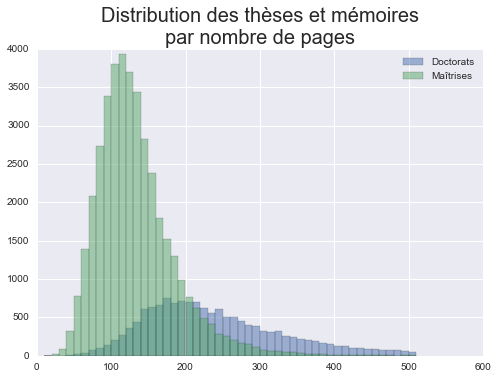

In [4]:
parType.hist(bins=50,histtype="bar",range=(10,510), alpha=0.5)
plt.legend(["Doctorats","Maîtrises"])
plt.title("Distribution des thèses et mémoires\npar nombre de pages",size=20)

-----

## Les doctorats

-----

Commençons par analyser seulement les doctorats en les regroupant tous dans une variable du même nom. Pandas peut nous décrire quelques-unes des données contenues dans ce sous-ensemble:

- l'année à laquelle le doctorat a été déposé
- son nombre de pages
- la longueur de son titre

In [5]:
doctorats = theses.query("type == 'doctorat'")
doctorats.describe()

,annee,octets,nbPages,longTitre
count,15097.000000,1.403500e+04,15097.000000,15097.000000
mean,2008.445320,1.757504e+07,251.340929,107.015566
std,6.029071,2.936516e+07,116.638041,41.183641
min,1990.000000,5.946900e+04,46.000000,14.000000
25%,2006.000000,3.945502e+06,172.000000,77.000000
50%,2010.000000,7.671272e+06,226.000000,102.000000
75%,2013.000000,1.641865e+07,302.000000,131.000000
max,2016.000000,5.581489e+08,1578.000000,378.000000


-----
C'est bien d'avoir des données sur l'ensemble des doctorats au Québec. Mais je suis curieux de savoir comment le nombre de pages de ces doctorats varie en fonction de l'université dans laquelle ils ont été réalisés.

Pandas nous aide ici encore en permettant d'effectuer un regroupement par université que j'ai placé dans une variable appelée `doctoratsUniv`.

In [6]:
doctoratsUniv = doctorats.groupby("universite")
doctoratsUniv.describe()

annee    longTitre      nbPages  \
universite                                                              
Concordia                count  2079.000000  2079.000000  2079.000000   
                         mean   2005.673401    89.589707   230.285233   
                         std       7.269765    34.370518    96.823321   
                         min    1990.000000    14.000000    61.000000   
                         25%    2000.000000    65.000000   162.000000   
                         50%    2008.000000    85.000000   210.000000   
                         75%    2012.000000   108.000000   276.000000   
                         max    2015.000000   261.000000  1112.000000   
HEC Montréal             count   286.000000   286.000000   286.000000   
                         mean   2006.437063    92.804196   258.132867   
                         std       6.136565    37.508784   145.435618   
                         min    1990.000000    26.000000    61.000000   
                         25%    2003.000000    62.250000   152.000000   
                         50%    2007.000000    89.000000   220.500000   
                         75%    2012.000000   118.000000   337.250000   
                         max    2016.000000   212.000000  1430.000000   
INRS                     count   499.000000   499.000000   499.000000   
                         mean   2008.030060   122.625251   246.112224   
                         std       5.860930    40.343130    88.203599   
                         min    1990.000000    37.000000    87.000000   
                         25%    2005.000000    95.000000   182.500000   
                         50%    2009.000000   118.000000   231.000000   
                         75%    2013.000000   146.500000   291.500000   
                         max    2016.000000   303.000000   682.000000   
McGill                   count  1927.000000  1927.000000  1927.000000   
                         mean   2004.746238    89.756098   246.120394   
                         std       7.590674    33.750700   104.115630   
                         min    1990.000000    16.000000    47.000000   
                         25%    1998.000000    65.000000   182.000000   
                         50%    2006.000000    85.000000   225.000000   
...                                     ...          ...          ...   
Université Laval         std       3.234690    41.847277   120.156801   
                         min    2002.000000    14.000000    57.000000   
                         25%    2008.000000    84.000000   174.000000   
                         50%    2011.000000   109.000000   232.000000   
                         75%    2014.000000   137.000000   311.000000   
                         max    2016.000000   378.000000  1478.000000   
Université de Montréal   count  2641.000000  2641.000000  2641.000000   
                         mean   2010.151079   109.820144   283.244983   
                         std       3.687238    38.697944   121.221355   
                         min    1990.000000    21.000000    49.000000   
                         25%    2008.000000    81.000000   202.000000   
                         50%    2010.000000   107.000000   260.000000   
                         75%    2013.000000   135.000000   338.000000   
                         max    2015.000000   259.000000  1578.000000   
Université de Sherbrooke count  1724.000000  1724.000000  1724.000000   
                         mean   2008.096868   117.897332   234.301044   
                         std       5.812250    43.160102   105.855871   
                         min    1990.000000    21.000000    46.000000   
                         25%    2004.000000    88.000000   163.000000   
                         50%    2009.000000   111.000000   208.000000   
                         75%    2013.000000   142.000000   276.000000   
                         max    2016.000000   351.000000   826.000000   
École Polytechnique    

-----
Classons maintenant les universités en fonction du nombre médian de pages de leurs doctorats, exercice intéressant en soi qui sera également utile pour l'étape suivante.

In [7]:
medianesDoctoratsUniv = doctoratsUniv["nbPages"].median().sort_values(ascending=False)
medianesDoctoratsUniv

universite
UQAM                        269.0
Université de Montréal      260.0
UQAC                        243.0
UQO                         238.5
Université Laval            232.0
INRS                        231.0
McGill                      225.0
UQAT                        220.5
HEC Montréal                220.5
Concordia                   210.0
Université de Sherbrooke    208.0
École Polytechnique         186.0
UQTR                        153.5
Name: nbPages, dtype: float64

-----
Pour illustrer la distribution du nombre de pages des doctorats par université, le meilleur type de graphique est peut-être le *box&nbsp;plot*, qu'on peut traduire par **diagramme de quartiles**... ou ce que les Français ont baptisé des [boîtes à moustaches](https://fr.wikipedia.org/wiki/Bo%C3%AEte_%C3%A0_moustaches).

![](http://www.statcan.gc.ca/edu/power-pouvoir/ch12/img/5214889_02-fra.gif)

Ces boîtes permettent d'afficher une distribution qui a été découpée en quartiles.<br>
Les deuxième et troisième quartiles, ceux qui se trouvent de part et d'autre de la médiane, sont représentés par deux rectangles, les boîtes.<br>
Les premier et dernier quartiles sont, quant à eux, représentés par des lignes, les moustaches.<br>
Des valeurs excentriques peuvent enfin être représentés par des points à gauche ou à droite des lignes.

J'ai essayé d'utiliser le [langage R](https://cran.r-project.org/doc/contrib/Goulet_introduction_programmation_R.pdf) pour en produire, comme l'a fait [Markus Beck](https://beckmw.wordpress.com/2014/07/15/average-dissertation-and-thesis-length-take-two/). Mais j'ai été incapable d'arriver à des résultats satisfaisants.

Après avoir essayé les librairies [matplotlib](http://matplotlib.org/) et [bokeh](http://bokeh.pydata.org/en/latest/), j'ai trouvé [seaborn](https://stanford.edu/~mwaskom/software/seaborn/) beaucoup plus facile à utiliser.<br>
Le code ci-dessous est relativement facile à comprendre. Matplotlib contrôle la taille finale du graphique au moyen de la méthode `plt.figure`, puis seaborn fait tout le reste. On remarque notamment que la méthode `sns.boxplot` a un paramètre qui permet d'ordonner nos boîtes (`order`), paramètre que j'ai alimenté avec l'index de la variable `medianesDoctoratsUniv` créé juste ci-dessus.

Au final, on a une idée de la distribution du nombre de pages des doctorats, par université. C'est à l'UQAM que les professeurs travaillent le plus (si on se fie au nombre de pages qu'ils doivent lire)... ou le moins (si on se fie au nombre de pages qu'ils laissent leurs doctorants écrire).

 (0, 750),

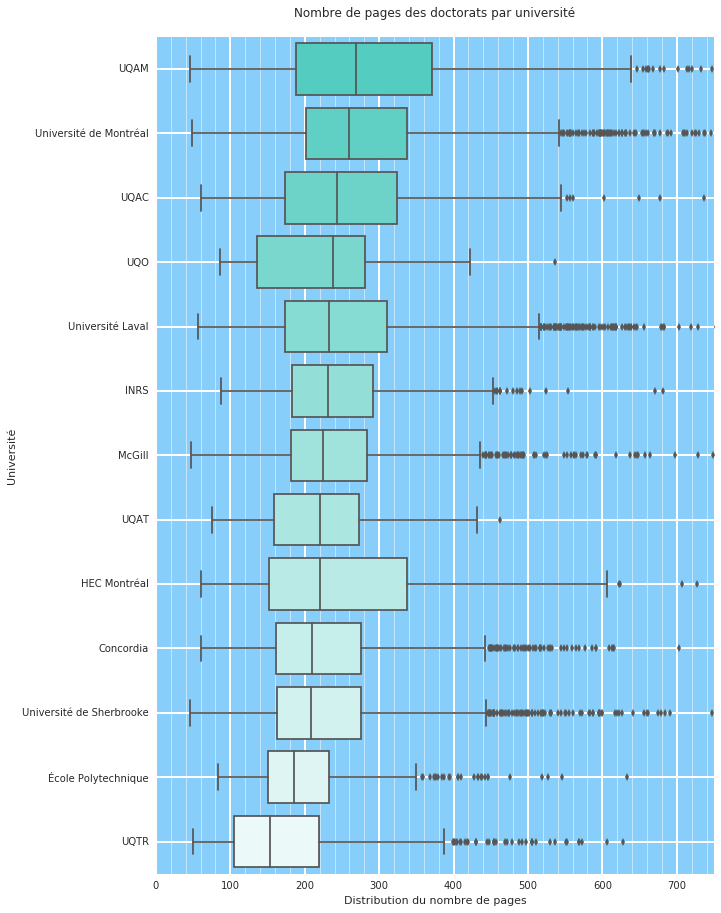

In [8]:
sns.set()
plt.figure(figsize=(10, 15))
sns.set_style("darkgrid", {
        "axes.facecolor": "lightskyblue",
        "font.family": [u"Bitstream Vera Sans"]
    })
couleurs = sns.light_palette("turquoise", n_colors=13, reverse=True)
boiteDoc = sns.boxplot(y="universite",
                       x="nbPages",
                       data=doctorats,
                       palette=couleurs,
                       order=medianesDoctoratsUniv.index
                      )
boiteDoc.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
boiteDoc.grid(b=True, which='major', color='w', linewidth=2.0)
boiteDoc.grid(b=True, which='minor', color='w', linewidth=0.5)
boiteDoc.set(ylabel="Université",
             xlabel="Distribution du nombre de pages",
             xlim=(0,750),
             title="Nombre de pages des doctorats par université\n"
            )

-----
On peut aussi créer un autre graphique à moustaches intéressant en regroupant les doctorats par discipline, plutôt que par université.<br>
On commence par créer une variable qui va nous permetter d'ordonner les disciplines en fonction de la médiane du nombre de pages (`medianesDoctoratsDiscipline`).

In [9]:
doctoratsDiscipline = doctorats.groupby("discipline")
medianesDoctoratsDiscipline = doctoratsDiscipline["nbPages"].median().sort_values(ascending=False)
medianesDoctoratsDiscipline

discipline
Droit                                 459.0
Relations industrielles               420.0
Histoire                              412.0
Anthropologie                         407.5
Traduction                            394.5
Études classiques                     392.5
Études françaises                     372.0
Cinéma                                366.0
Histoire de l'art                     364.0
Littérature                           355.0
Sociologie                            350.0
Science politique                     346.0
Religion/théologie                    340.5
Pédagogie                             336.0
Communication                         335.0
Aménagement/urbanisme                 330.0
Gérontologie                          329.0
Études islamiques                     328.5
Philosophie                           324.0
Sciences humaines générales           315.0
Administration publique               314.0
Études hispaniques                    313.0
Linguistique         

-----
Puis on fait un diagramme par quartiles de la même façon qu'on vient de le faire avec les universités.<br>
Le résultat est un graphique complexe, mais riche en information. C'est en droit que les doctorants sont le plus prolixes, alors que les mathématiciens et statisticiens ont davantage l'habitude d'être *right to the point*.

 (0, 750),

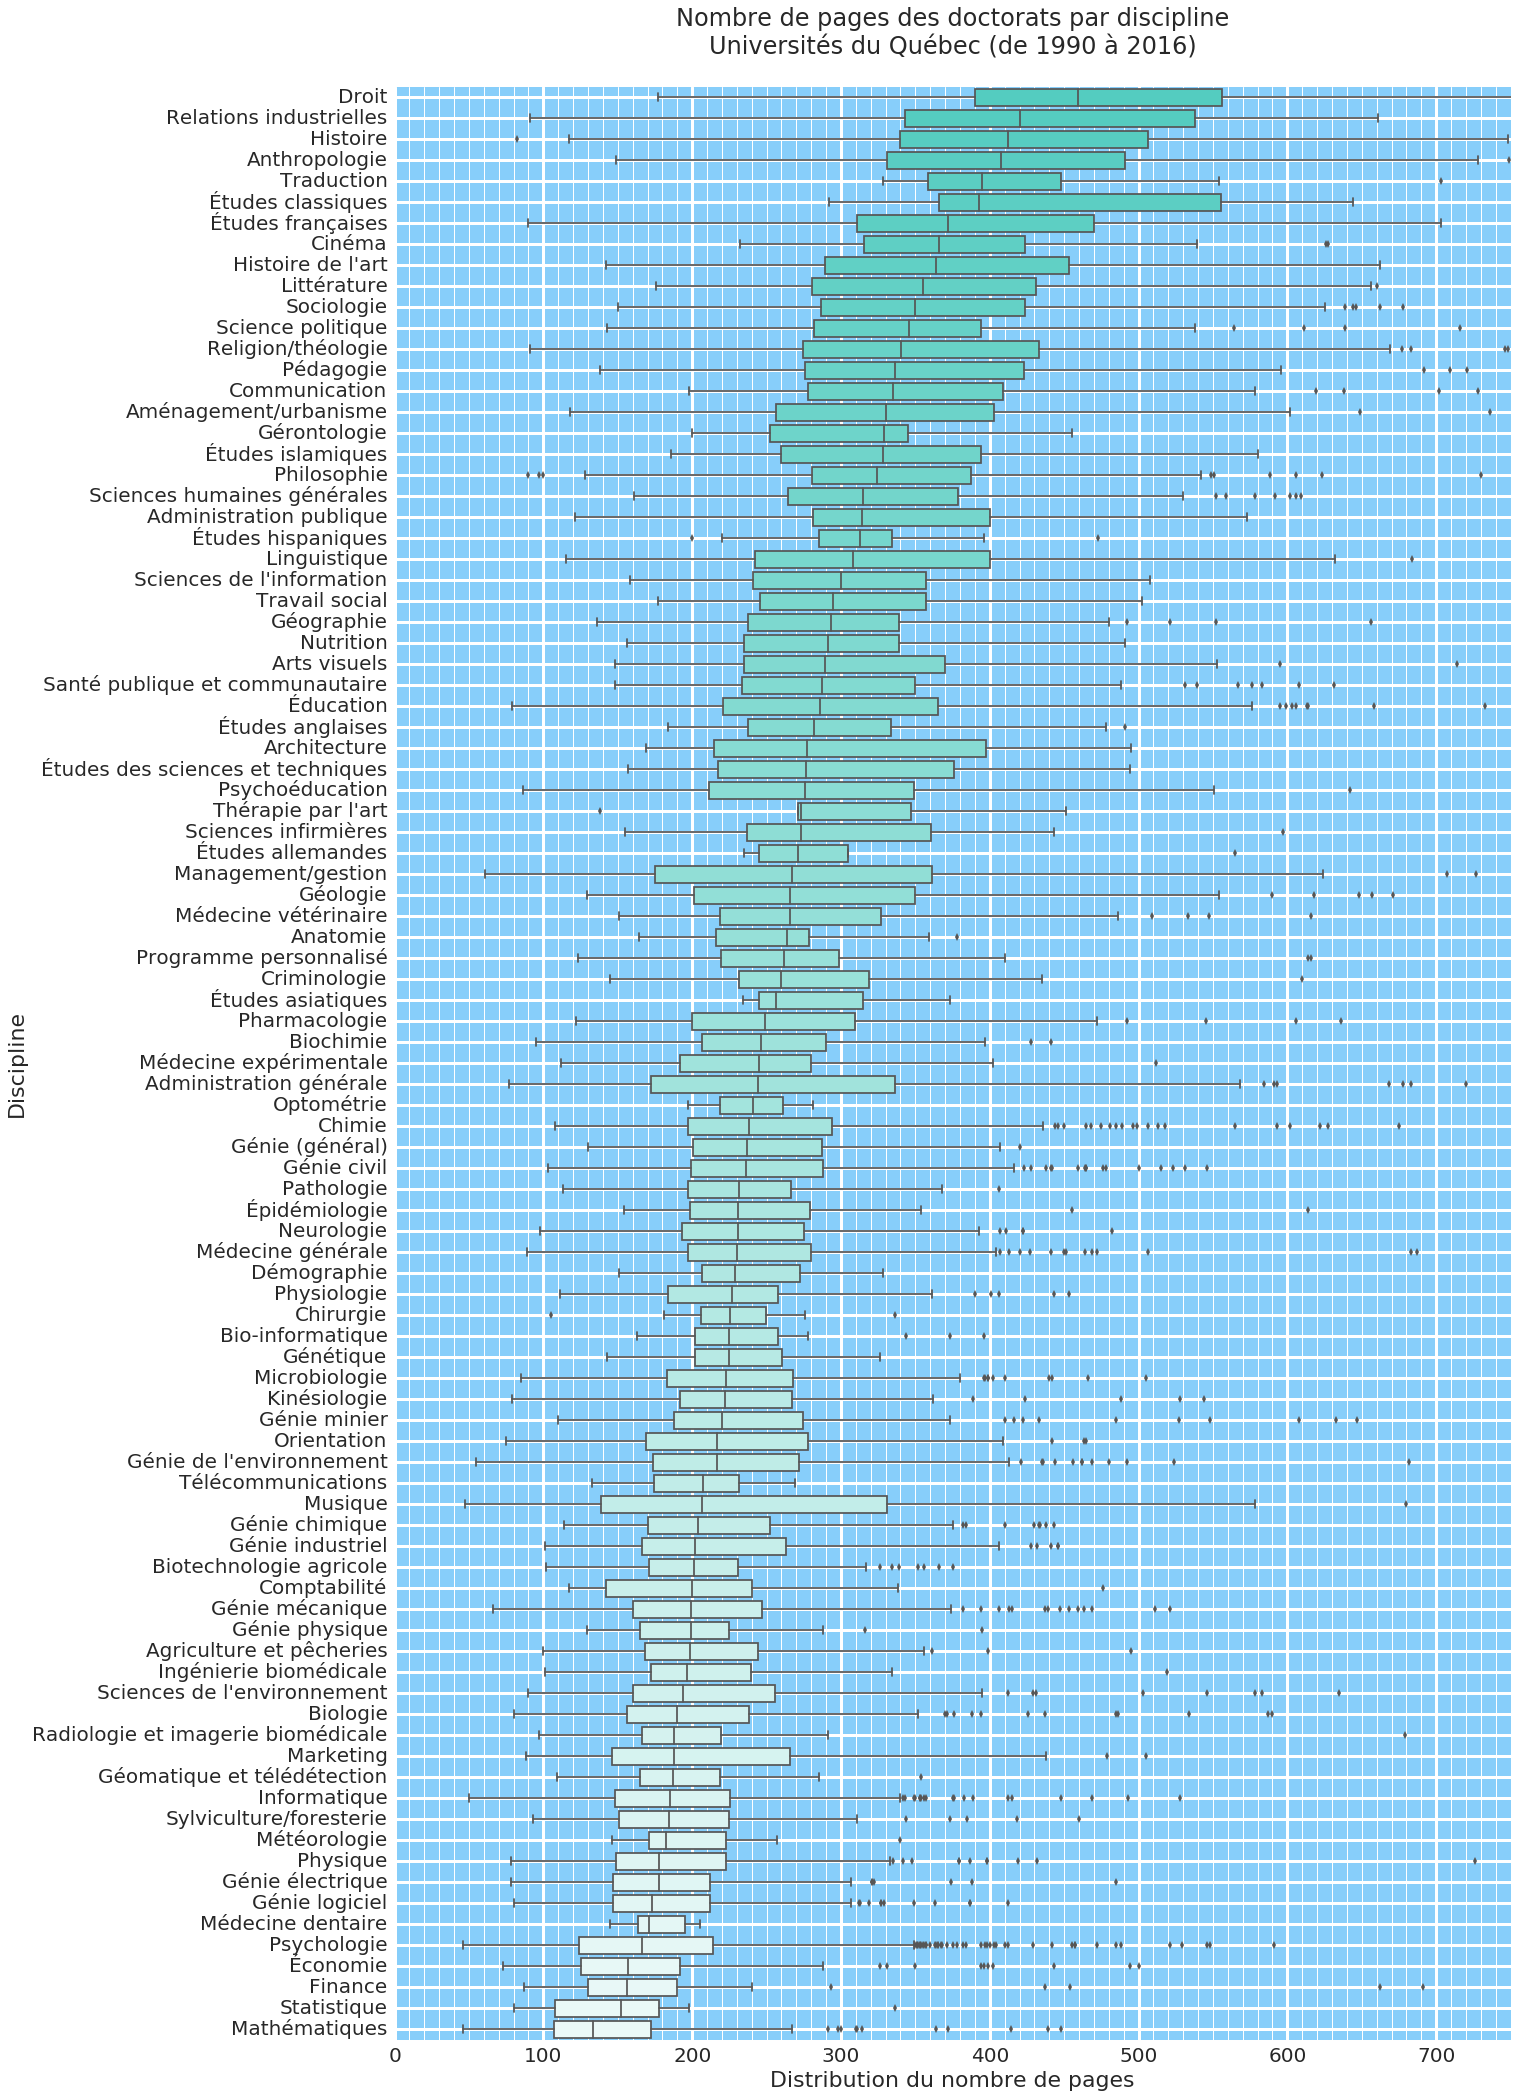

In [10]:
sns.set()
sns.set_context("poster")
sns.set(font_scale=2)
plt.figure(figsize=(20, 35))
sns.set_style("darkgrid", {
        "axes.facecolor": "lightskyblue",
        "font.family": [u"Bitstream Vera Sans"]
    })
couleurs = sns.light_palette("turquoise", n_colors=93, reverse=True)
boiteDoc = sns.boxplot(y="discipline",
                       x="nbPages",
                       data=doctorats,
                       palette=couleurs,
                       order=medianesDoctoratsDiscipline.index
                      )
boiteDoc.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator(n=10))
boiteDoc.grid(b=True, which='major', color='w', linewidth=3.0)
boiteDoc.grid(b=True, which='minor', color='w', linewidth=1)
boiteDoc.set(ylabel="Discipline",
             xlabel="Distribution du nombre de pages",
             xlim=(0,750),
             title="Nombre de pages des doctorats par discipline\nUniversités du Québec (de 1990 à 2016)\n"
            )

-----

## Les maîtrises

-----

On peut maintenant faire la même chose pour les maîtrises en suivant exactement les mêmes étapes.

In [11]:
maitrises = theses.query("type == 'maîtrise'")
maitrises.describe()

,annee,octets,nbPages,longTitre
count,40486.000000,3.477800e+04,40486.000000,40486.000000
mean,2007.033691,8.790473e+06,133.282023,102.193672
std,6.312805,1.820470e+07,54.083320,39.216376
min,1990.000000,9.075000e+03,19.000000,4.000000
25%,2004.000000,2.322921e+06,98.000000,75.000000
50%,2008.000000,4.191776e+06,124.000000,98.000000
75%,2012.000000,8.056662e+06,157.000000,125.000000
max,2016.000000,1.916892e+09,744.000000,345.000000


In [12]:
maitrisesUniv = maitrises.groupby("universite")
maitrisesUniv.describe()

annee    longTitre      nbPages  \
universite                                                              
Concordia                count  7210.000000  7210.000000  7210.000000   
                         mean   2004.673786    83.308460   125.848128   
                         std       6.978006    32.854020    49.743067   
                         min    1990.000000     4.000000    19.000000   
                         25%    2000.000000    61.000000    94.000000   
                         50%    2006.000000    80.000000   117.000000   
                         75%    2010.000000   103.000000   149.000000   
                         max    2016.000000   251.000000   666.000000   
HEC Montréal             count  2691.000000  2691.000000  2691.000000   
                         mean   2004.829431    98.866592   146.237087   
                         std       5.603063    35.700203    66.552327   
                         min    1990.000000    21.000000    27.000000   
                         25%    2001.000000    74.000000    97.000000   
                         50%    2005.000000    94.000000   136.000000   
                         75%    2009.000000   119.000000   181.000000   
                         max    2015.000000   289.000000   671.000000   
INRS                     count   852.000000   852.000000   852.000000   
                         mean   2006.393192   118.221831   135.187793   
                         std       6.125526    38.144186    54.682525   
                         min    1990.000000    39.000000    46.000000   
                         25%    2003.000000    89.000000    98.000000   
                         50%    2007.000000   115.000000   124.000000   
                         75%    2011.000000   141.000000   158.250000   
                         max    2016.000000   259.000000   572.000000   
McGill                   count  3169.000000  3169.000000  3169.000000   
                         mean   2003.526033    87.065636   113.933733   
                         std       7.550171    33.343854    35.053225   
                         min    1990.000000     9.000000    27.000000   
                         25%    1997.000000    63.000000    91.000000   
                         50%    2004.000000    82.000000   109.000000   
...                                     ...          ...          ...   
Université Laval         std       3.094363    39.890720    53.539320   
                         min    2003.000000     6.000000    26.000000   
                         25%    2008.000000    82.000000    93.500000   
                         50%    2010.000000   106.000000   120.000000   
                         75%    2013.000000   133.000000   153.000000   
                         max    2016.000000   345.000000   743.000000   
Université de Montréal   count  5368.000000  5368.000000  5368.000000   
                         mean   2009.920268   105.663376   134.533905   
                         std       3.593720    36.558156    47.373174   
                         min    1990.000000    13.000000    25.000000   
                         25%    2008.000000    79.000000   104.000000   
                         50%    2010.000000   103.000000   128.000000   
                         75%    2013.000000   129.000000   157.000000   
                         max    2015.000000   288.000000   541.000000   
Université de Sherbrooke count  4640.000000  4640.000000  4640.000000   
                         mean   2006.019397   110.667457   140.139871   
                         std       6.288464    39.815207    54.996114   
                         min    1990.000000    14.000000    30.000000   
                         25%    2001.000000    83.000000   104.000000   
                         50%    2007.000000   107.000000   130.000000   
                         75%    2011.000000   134.000000   165.000000   
                         max    2016.000000   305.000000   712.000000   
École Polytechnique    

In [13]:
medianesMaitrisesUniv = maitrises.groupby("universite")["nbPages"].median().sort_values(ascending=False)
medianesMaitrisesUniv

universite
UQAC                        144.0
HEC Montréal                136.0
UQAM                        135.0
UQAT                        131.0
Université de Sherbrooke    130.0
Université de Montréal      128.0
INRS                        124.0
École Polytechnique         123.5
Université Laval            120.0
UQTR                        118.0
UQO                         117.5
Concordia                   117.0
McGill                      109.0
Name: nbPages, dtype: float64

 (0, 350),

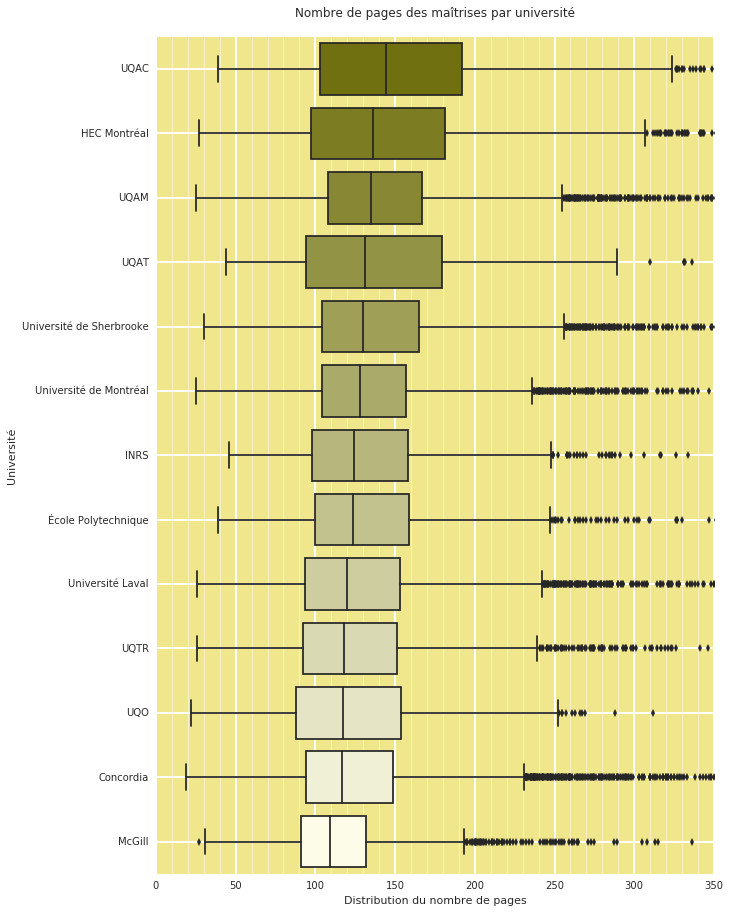

In [14]:
sns.set()
plt.figure(figsize=(10, 15))
sns.set_style("darkgrid", {
        "axes.facecolor": "khaki",
        "font.family": [u"Bitstream Vera Sans"]
    })
couleurs = sns.light_palette("olive", n_colors=13, reverse=True)
boiteDoc = sns.boxplot(y="universite",
                       x="nbPages",
                       data=maitrises,
                       palette=couleurs,
                       order=medianesMaitrisesUniv.index
                      )
boiteDoc.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
boiteDoc.grid(b=True, which='major', color='w', linewidth=2.0)
boiteDoc.grid(b=True, which='minor', color='w', linewidth=0.5)
boiteDoc.set(ylabel="Université",
             xlabel="Distribution du nombre de pages",
             xlim=(0,350),
             title="Nombre de pages des maîtrises par université\n"
            )

In [15]:
medianesMaitrisesDiscipline = maitrises.groupby("discipline")["nbPages"].median().sort_values(ascending=False)
medianesMaitrisesDiscipline

discipline
Design                               179.0
Danse                                176.0
Aménagement/urbanisme                164.0
Sciences infirmières                 158.5
Management/gestion                   158.0
Droit                                158.0
Gérontologie                         157.0
Génie (général)                      157.0
Anthropologie                        154.5
Relations industrielles              152.0
Génie civil                          149.0
Travail social                       148.0
Sociologie                           146.0
Sciences humaines générales          145.0
Pédagogie                            144.0
Études juives                        143.5
Sciences de l'information            143.0
Histoire                             143.0
Géographie                           141.0
Linguistique                         139.0
Éducation                            138.0
Génie minier                         137.5
Histoire de l'art                    137.5


 (0, 350),

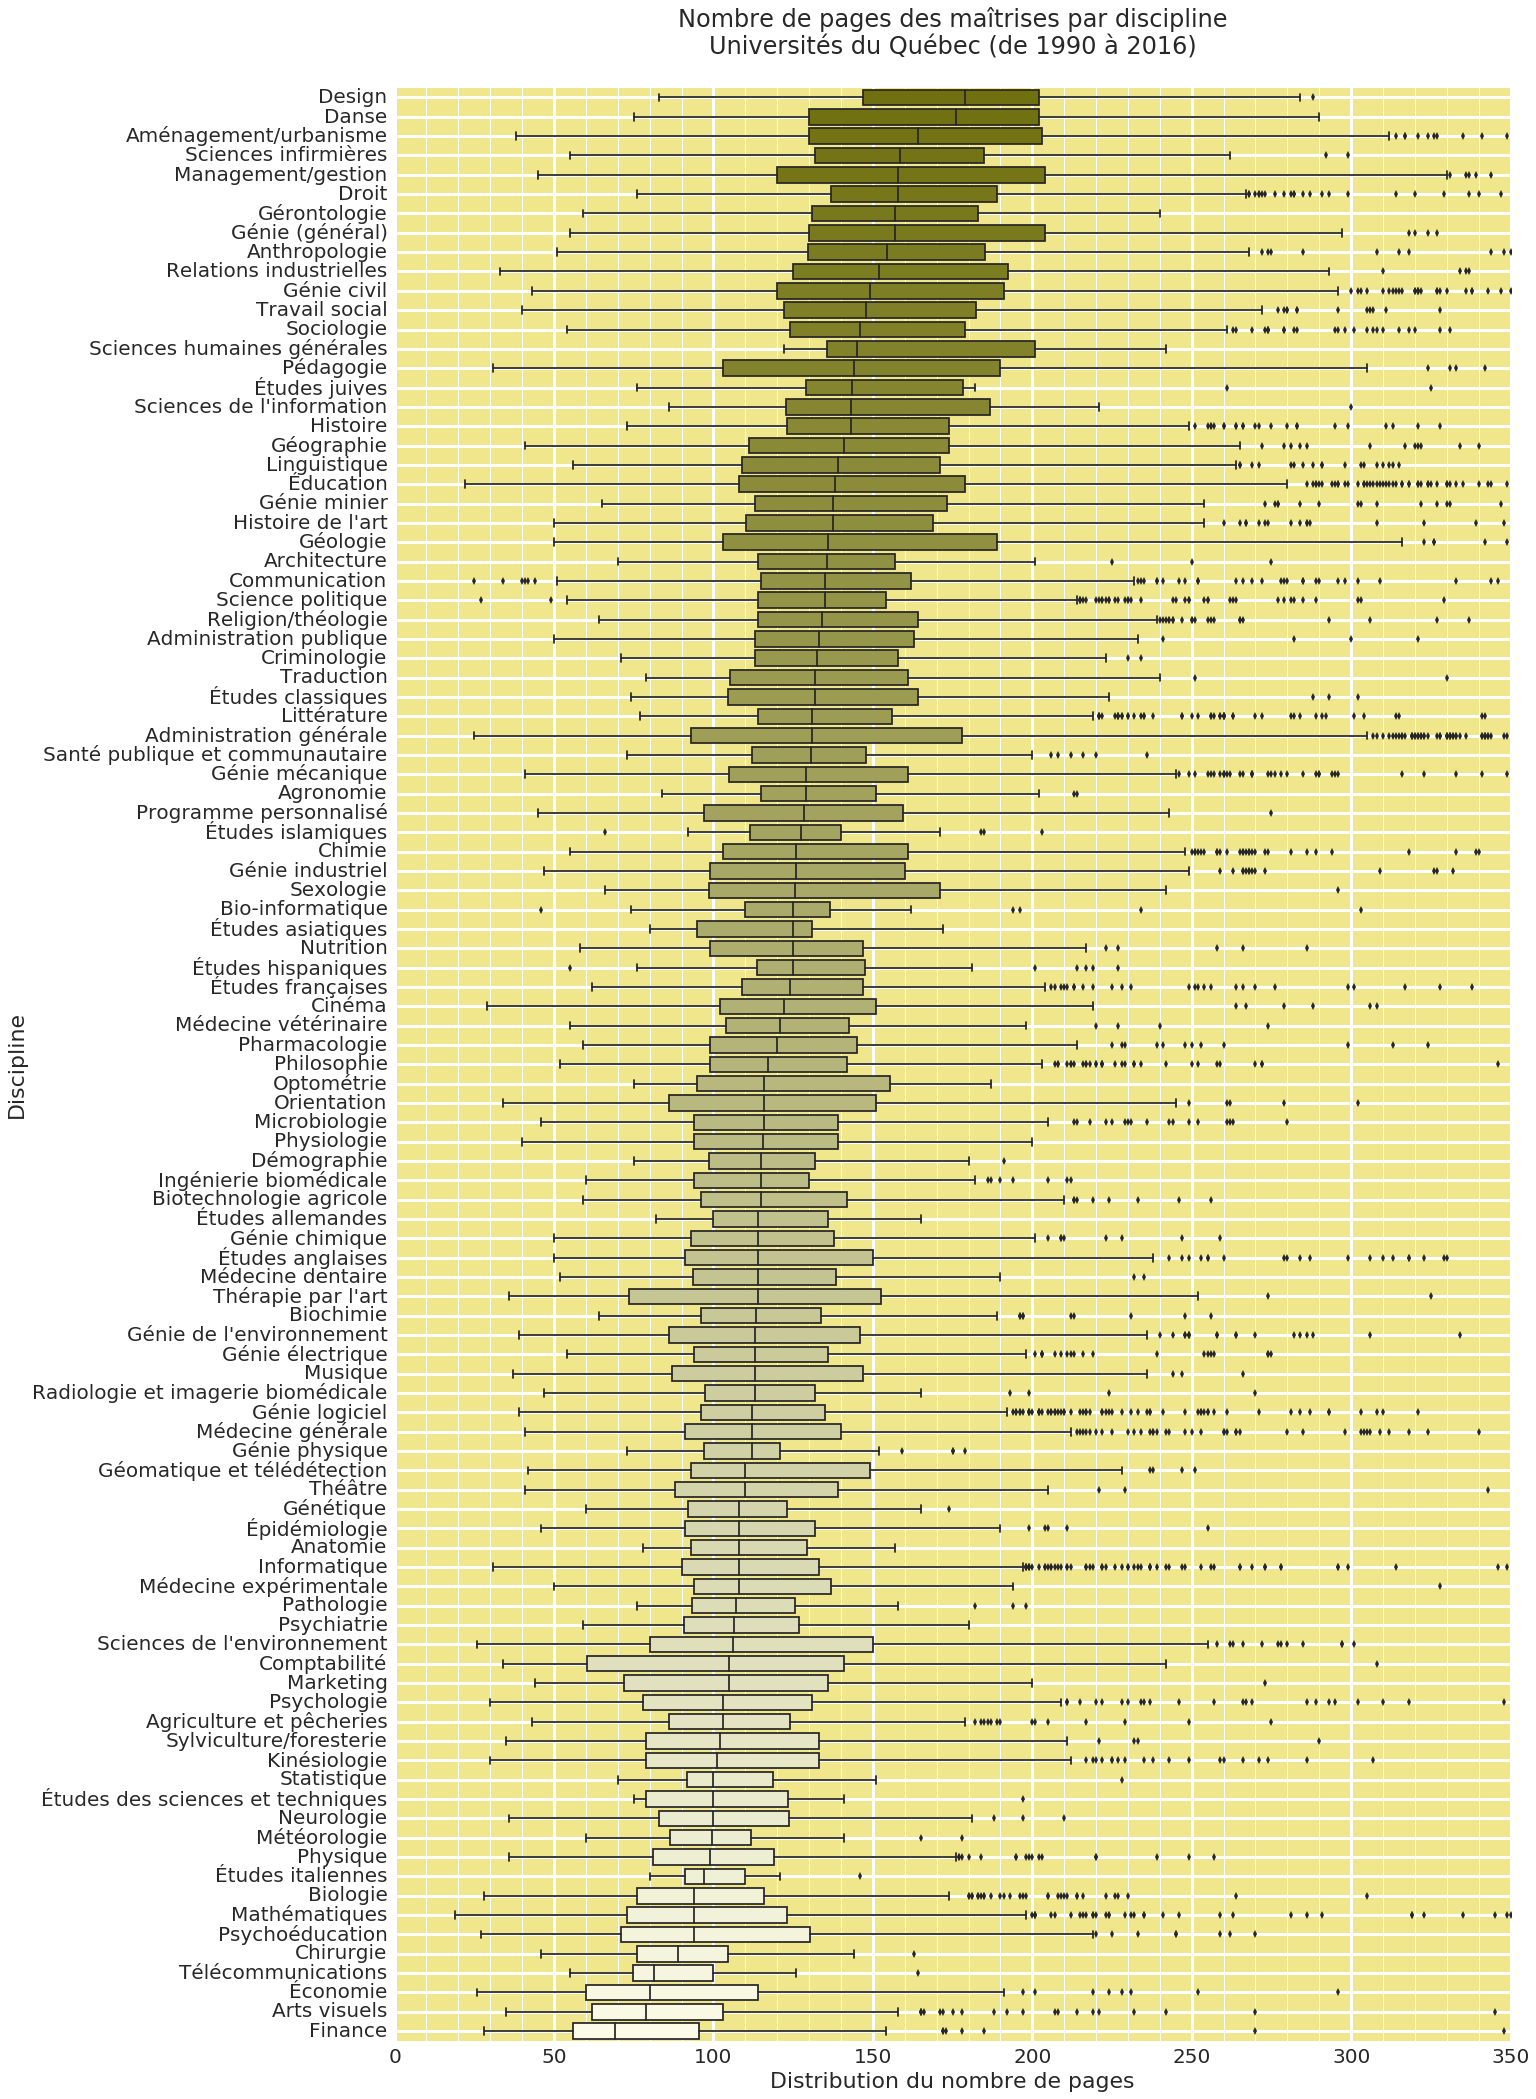

In [16]:
sns.set()
sns.set_context("poster")
sns.set(font_scale=2)
plt.figure(figsize=(20, 35))
sns.set_style("darkgrid", {
        "axes.facecolor": "khaki",
        "font.family": [u"Bitstream Vera Sans"]
    })
couleurs = sns.light_palette("olive", n_colors=102, reverse=True)
boiteMait = sns.boxplot(y="discipline",
                       x="nbPages",
                       data=maitrises,
                       palette=couleurs,
                       order=medianesMaitrisesDiscipline.index
                      )
boiteMait.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator(n=5))
boiteMait.grid(b=True, which='major', color='w', linewidth=3.0)
boiteMait.grid(b=True, which='minor', color='w', linewidth=1)
boiteMait.set(ylabel="Discipline",
             xlabel="Distribution du nombre de pages",
             xlim=(0,350),
             title="Nombre de pages des maîtrises par discipline\nUniversités du Québec (de 1990 à 2016)\n"
            )

-----
### Un dernier graphique, juste pour le kik

Seaborn permet aussi de tracer des graphiques en forme de violon, ou *violin&nbsp;plots*. Cela ressemble à des diagrammes à moustaches, sauf qu'on n'y découpe pas la matière en quartiles. On y donne plutôt un aperçu de la densité réelle de la distribution.<br>
Il est aussi possible de représenter deux catégories sur chaque violon, ce qui est parfait pour le cas qui nous intéresse, puisqu'on a justement deux catégories à représenter: les maîtrises et les doctorats. Elles sont identifiées par le paramètre `hue` de la méthode `sns.violinplot` dans le code ci-dessous.

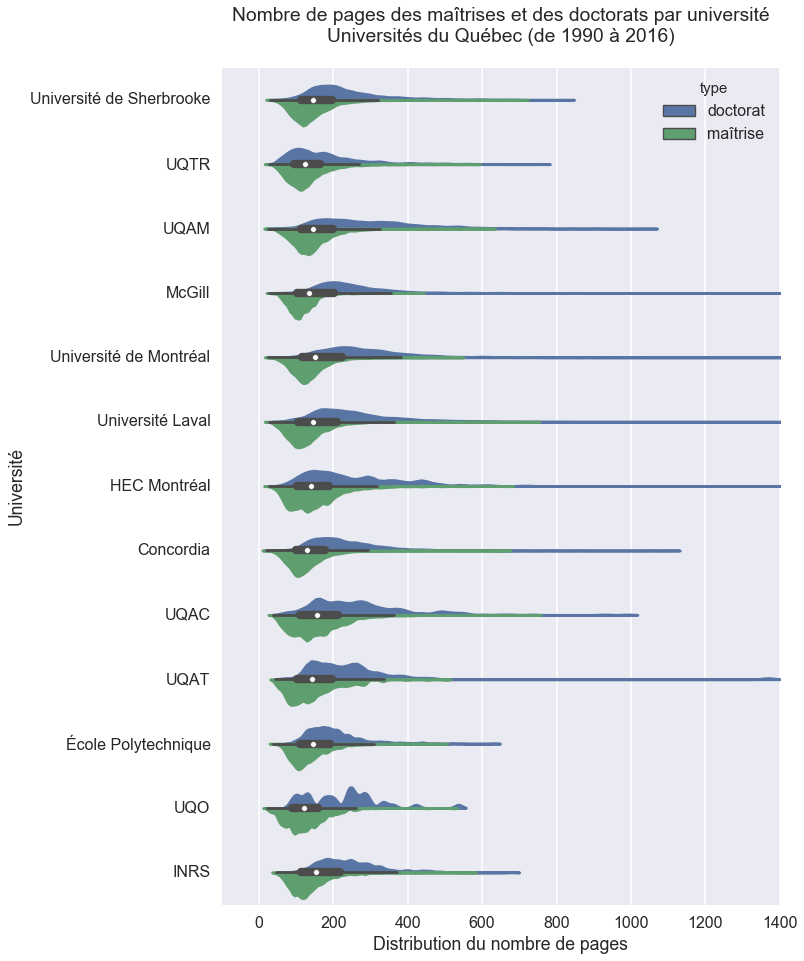

In [17]:
sns.set_style("darkgrid")
sns.set_context("poster")
plt.figure(figsize=(10, 15))
violon = sns.violinplot(y="universite", x="nbPages", data=theses, bw=.1, hue="type", split=True)
violon.set(ylabel="Université",
             xlabel="Distribution du nombre de pages",
             xlim=(-100,1400),
             title="Nombre de pages des maîtrises et des doctorats par université\nUniversités du Québec (de 1990 à 2016)\n"
            )
sns.despine()